In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Bayes Decision Theory — Discrete Features

Until now we have assumed that the feature vector $\mathbf{x}$ could be any point in a $d$-dimensional Euclidean space, $\mathbb{R}^d$. However, in many practical applications, the components of $\mathbf{x}$ are binary-, ternary-, or higher integer-valued, so that $\mathbf{x}$ can assume only one of $m$ discrete values $v_1, \ldots, v_m$. In such cases, the probability density function $p(\mathbf{x}|\omega_j)$ becomes singular; integrals of the form 

$$
\int p(\mathbf{x}|\omega_j) d\mathbf{x}
$$

must then be replaced by corresponding sums, such as 

$$
\sum P(v_k|\omega_j),
$$

where we understand that the summation is over all values of $\mathbf{x}$ in the discrete distribution.

Bayes' formula then involves probabilities, rather than probability densities:

$$
P(\omega_j | \mathbf{x}) = \frac{P(\mathbf{x}|\omega_j)P(\omega_j)}{P(\mathbf{x})},
$$

where 

$$
P(\mathbf{x}) = \sum P(\mathbf{x}|\omega_j)P(\omega_j).
$$

The definition of the conditional risk $R(\alpha | \mathbf{x})$ is unchanged, and the fundamental Bayes decision rule remains the same: To minimize the overall risk, select the action $\alpha_i$ for which 

$$
\alpha^* = \arg \min R(\alpha_i | \mathbf{x}).
$$

The basic rule to minimize the error rate by maximizing the posterior probability is also unchanged, as are the discriminant functions, given the obvious replacement of densities $p(\cdot)$ by probabilities $P(\cdot)$.

## Independent Binary Features

As an example of a classification involving discrete features, consider the two-category problem in which the components of the feature vector are binary-valued and conditionally independent. To be more specific, we let 

$$
\mathbf{x} = (x_1, \ldots, x_d)^T,
$$ 

where the components $x_i$ are either $0$ or $1$, with 

$$
p_i = \text{Prob}(x_i = 1 | \omega_1)
$$

and 

$$
q_i = \text{Prob}(x_i = 1 | \omega_2).
$$

This is a model of a classification problem in which each feature gives us a yes/no answer about the pattern. If $p_i > q_i$, we expect the $i$th feature to give a “yes” answer more frequently when the state of nature is $\omega_1$ than when it is $\omega_2$. 

By assuming conditional independence, we can write 

$$
P(\mathbf{x}|\omega_1) = \prod_{i=1}^{d} p_i^{x_i} (1 - p_i)^{1 - x_i}
$$ 

and 

$$
P(\mathbf{x}|\omega_2) = \prod_{i=1}^{d} q_i^{x_i} (1 - q_i)^{1 - x_i}.
$$

Then the likelihood ratio is given by 

$$
\frac{P(\mathbf{x}|\omega_1)}{P(\mathbf{x}|\omega_2)} = \prod_{i=1}^{d} \frac{p_i^{x_i} (1 - p_i)^{1 - x_i}}{q_i^{x_i} (1 - q_i)^{1 - x_i}}.
$$ 

Consequently, the discriminant function becomes 

$$
g(\mathbf{x}) = \sum_{i=1}^{d} \left( \frac{p_i}{q_i} \cdot \frac{1 - p_i}{1 - q_i} \right)^{x_i} + \ln P(\omega_1) - \ln P(\omega_2).
$$

We note especially that this discriminant function is linear in the $x_i$ and thus we can write 

$$
g(\mathbf{x}) = \sum_{i=1}^{d} w_i x_i + w_0,
$$ 

where 

$$
w_i = \ln\left(\frac{p_i (1 - q_i)}{q_i (1 - p_i)}\right) \quad \text{for } i = 1, \ldots, d
$$ 

and 

$$
w_0 = \ln\left(\frac{P(\omega_1)}{P(\omega_2)}\right).
$$

Let us examine these results to see what insight they can give. Recall first that we decide $\omega_1$ if $g(\mathbf{x}) > 0$ and $\omega_2$ if $g(\mathbf{x}) \leq 0$. We have seen that $g(\mathbf{x})$ is a weighted combination of the components of $\mathbf{x}$. The magnitude of the weight $w_i$ indicates the relevance of a “yes” answer for $x_i$ in determining the classification. 

If $p_i = q_i$, $x_i$ gives us no information about the state of nature, and $w_i = 0$, just as we might expect. For $x_i$ that contributes positively, it contributes $w_i$ votes for $\omega_1$. Furthermore, for any fixed $q_i < 1$, $w_i$ gets larger as $p_i$ gets larger. On the other hand, if $p_i < q_i$, $w_i$ is negative, and a “yes” answer contributes $|w_i|$ votes for $\omega_2$. 

The condition of feature independence leads to a very simple (linear) classifier; of course, if the features were not independent, a more complicated classifier would be needed. 

The prior probabilities $P(\omega_i)$ appear in the discriminant only through the threshold weight $w_0$. Increasing $P(\omega_1)$ increases $w_0$ and biases the decision in favor of $\omega_1$, whereas decreasing $P(\omega_1)$ has the opposite effect. 

Geometrically, the possible values for $\mathbf{x}$ appear as the vertices of a $d$-dimensional hypercube; the decision surface defined by $g(\mathbf{x}) = 0$ is a hyperplane that separates $\omega_1$ vertices from $\omega_2$ vertices.


In [1]:
# Implementation of Bayes Decision Theory for Independent Binary Features

# Function to compute the discriminant function
def compute_discriminant(features, prior, p, q):
    """
    Compute the discriminant function value for a given set of features.

    :param features: List of binary features (0 or 1)
    :param prior: Prior probability P(ω1)
    :param p: List of probabilities P(xi=1|ω1)
    :param q: List of probabilities P(xi=1|ω2)
    :return: Discriminant value
    """
    d = len(features)
    g = 0  # Initialize discriminant value

    for i in range(d):
        if features[i] == 1:
            g += (p[i] / q[i])
        else:
            g += ((1 - p[i]) / (1 - q[i]))

    # Adding the log of the prior probabilities
    g = g + (prior / (1 - prior))
    
    return g

# Function to classify based on the discriminant
def classify(features, prior, p, q):
    """
    Classify the given features into one of the two classes.

    :param features: List of binary features (0 or 1)
    :param prior: Prior probability P(ω1)
    :param p: List of probabilities P(xi=1|ω1)
    :param q: List of probabilities P(xi=1|ω2)
    :return: Class label (ω1 or ω2)
    """
    g = compute_discriminant(features, prior, p, q)
    return "ω1" if g > 0 else "ω2"

# Example usage
if __name__ == "__main__":
    # Define prior probabilities
    P_omega1 = 0.6  # Prior probability P(ω1)
    P_omega2 = 1 - P_omega1  # Prior probability P(ω2)

    # Define probabilities for features
    p = [0.8, 0.7, 0.6]  # P(xi=1|ω1) for each feature
    q = [0.4, 0.3, 0.2]  # P(xi=1|ω2) for each feature

    # New observation with binary features
    new_observation = [1, 0, 1]  # Example features

    # Classify the observation
    classification = classify(new_observation, P_omega1, p, q)
    print(f"The classification for the observation {new_observation} is: {classification}")


The classification for the observation [1, 0, 1] is: ω1


## Bayesian Decisions for Three-Dimensional Binary Features

In this example, we will explore Bayesian decision boundaries in a three-dimensional space with independent binary features. 

### Problem Setup

We have two categories with the following conditions:
- Prior probabilities: 
  $$ P(\omega_1) = P(\omega_2) = 0.5 $$

- Feature probabilities:
  - For features $ x_1, x_2, x_3 $:
    $$ p_i = 0.8 \quad (i = 1, 2, 3) $$
    $$ q_i = 0.5 \quad (i = 1, 2, 3) $$

Using the formulas for weights and bias:

$$ w_i = \frac{p_i(1 - q_i)}{q_i(1 - p_i)} $$
$$ w_0 = \sum_{i=1}^{3} \ln\left(\frac{1 - p_i}{1 - q_i}\right) + \ln\left(\frac{P(\omega_1)}{P(\omega_2)}\right) $$

### Weights and Bias Calculation

For $ p_i = 0.8 $ and $ q_i = 0.5 $:

- The weights can be calculated as:
  
  $$ w_1 = w_2 = w_3 = \ln\left(\frac{0.8(1 - 0.5)}{0.5(1 - 0.8)}\right) = 1.3863 $$

- The bias is given by:
  
  $$ w_0 = 3 \cdot \ln\left(\frac{1 - 0.8}{0.5}\right) = 1.2 $$

### Decision Boundary

The decision boundary is represented by the equation:

$$ g(x) = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_0 = 0 $$

- As we might expect, the boundary places points with two or more "yes" answers into category $ \omega_1 $, since that category has a higher probability of having any feature value of 1.

### Case 2: No Predictive Information from Feature $ x_3 $

Suppose instead that while the prior probabilities remain the same, our individual components obey:

- Feature probabilities:
  $$ p_1 = p_2 = 0.8, \quad p_3 = 0.5 $$
  $$ q_1 = q_2 = q_3 = 0.5 $$

In this case, feature $ x_3 $ gives us no predictive information about the categories, leading to a decision boundary parallel to the $ x_3 $ axis.

### Visualization of Decision Boundaries

Now we will visualize the decision boundaries in both cases using a Python implementation.

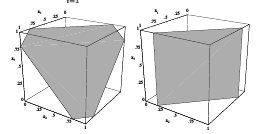


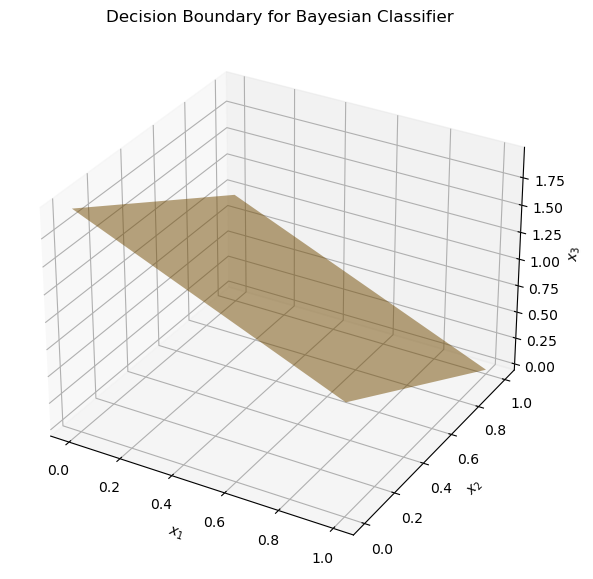

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the parameters
P_omega1 = 0.5
P_omega2 = 0.5
p = [0.8, 0.8, 0.8]  # p1, p2, p3
q = [0.5, 0.5, 0.5]  # q1, q2, q3

# Compute weights
w = [np.log((p[i] * (1 - q[i])) / (q[i] * (1 - p[i]))) for i in range(3)]
w0 = sum(np.log((1 - p[i]) / (1 - q[i])) for i in range(3)) + np.log(P_omega1 / P_omega2)

# Create a meshgrid for x1 and x2
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
x1, x2 = np.meshgrid(x1, x2)

# Calculate decision boundary g(x) = 0
x3_boundary = (-(w[0] * x1 + w[1] * x2 + w0)) / w[2]

# 3D Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary
ax.plot_surface(x1, x2, x3_boundary, alpha=0.5, rstride=100, cstride=100, color='orange', label='Decision Boundary')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_title('Decision Boundary for Bayesian Classifier')

plt.show()


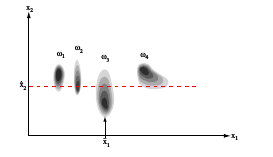

Fig.22: Four categories have equal priors and the class-conditional distributions shown. If a test point is presented in which one feature is missing (here, x1 ) and the other is measured to have value x̂2 (red dashed line), we want our classiﬁer to classify the pattern as category ω2 , because p(x̂2 |ω2 ) is the largest of the four likelihoods.

## Missing and Noisy Features in Bayesian Classification

In this section, we will discuss how to classify corrupted input data using Bayes decision rule when dealing with missing or noisy features.

## Missing Features

Consider a Bayesian recognizer designed to classify patterns using two features, but one of the features is missing for a particular test pattern. 

For instance, we might have a situation where the lightness of a fish can be measured, but its width cannot due to occlusion. 

### Example with Four Categories

Let's assume we have four categories $ \omega_1, \omega_2, \omega_3, \omega_4 $ with equal priors. If feature $ x_1 $ is missing and we have the measured value $ \hat{x}_2 $, we will classify the pattern based on the likelihoods.

- If we assume the missing value $ x_1 $ is the mean of all $ x_1 $ values (denoted $ \bar{x}_1 $), we might classify the pattern as $ \omega_3 $.
- However, if the priors are equal, category $ \omega_2 $ would be a better choice since $ p(\hat{x}_2 | \omega_2) $ is the largest of the likelihoods.

### Bayesian Posterior Probability

Let $ x = [x_g, x_b] $, where:
- $ x_g $ represents the known or "good" features,
- $ x_b $ represents the "bad" features (either unknown or missing).

We need the posterior probabilities in terms of the good features. The posterior probability can be expressed as:

$$ P(\omega_i | x_g) = \frac{P(\omega_i, x_g)}{p(x_g)} $$

Where we integrate over the missing features:

$$ P(\omega_i | x_g) = \frac{\int P(\omega_i, x_g, x_b) \, dx_b}{p(x_g)} $$

This indicates that we must integrate (marginalize) the posterior probability over the bad features. 

Finally, we apply the Bayes decision rule on the resulting posterior probabilities:

$$ \text{Choose } \omega_i \text{ if } P(\omega_i | x_g) > P(\omega_j | x_g) \text{ for all } i \text{ and } j $$

## Noisy Features

The case of noisy features can be understood similarly. Suppose one feature has been corrupted by statistically independent noise. 

### Example with Noise Model

In our fish classification example, let's assume that we have reliable measurements of length (a good feature), while the lightness measurement might be degraded by noise.

- We let $ x_b $ denote the noisy measurements, and $ x_t $ represent the true values of the features.

The posterior probability can be expressed as:

$$ P(\omega_i | x_g, x_b) = \frac{\int P(\omega_i, x_g, x_b, x_t) \, dx_t}{p(x_g, x_b)} $$

Under the independence assumption, we have:

$$ P(\omega_i | x_g, x_b, x_t) = P(\omega_i | x_g, x_t) $$

This leads us to:

$$ P(\omega_i | x_g, x_b) = \frac{\int P(\omega_i | x_g, x_t) p(x_g, x_t) p(x_b | x_t) \, dx_t}{\int p(x_g, x_t) p(x_b | x_t) \, dx_t} $$

This can be simplified as:

$$ P(\omega_i | x_g, x_b) = \frac{\int g_i(x) p(x) p(x_b | x_t) \, dx_t}{\int p(x) p(x_b | x_t) \, dx_t} $$

Where $ g_i(x) $ serves as our discriminant function for classification. 

### Conclusion

In the extreme case where $ p(x_b | x_t) $ is uniform over the entire space (providing no predictive information), this reduces to the case of missing features, yielding a satisfying result.

We will explore the Expectation-Maximization (EM) algorithm to address related problems involving missing features in the next chapter.


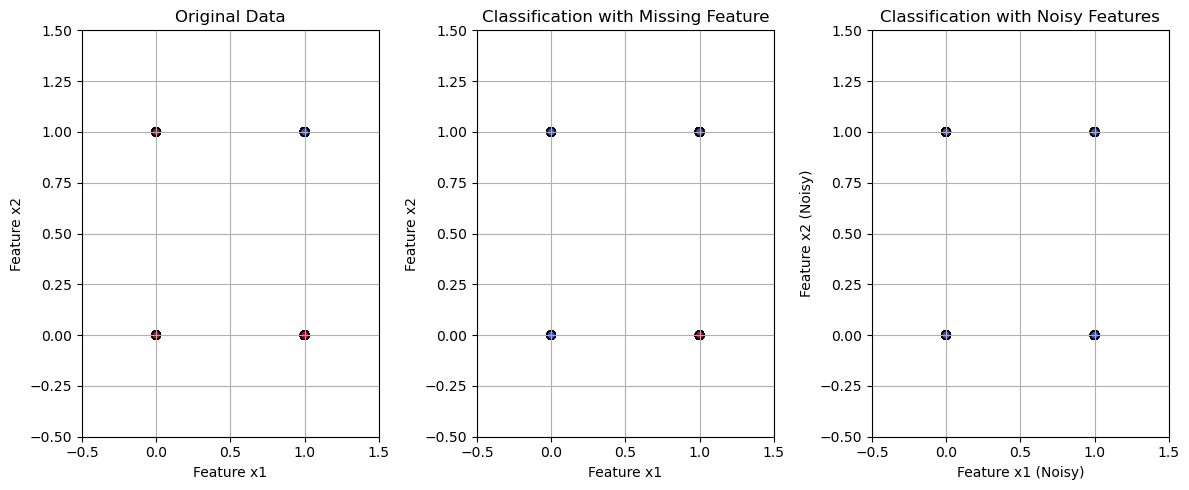

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Function to simulate data
def generate_data(num_samples=100):
    # Generate two features (x1, x2) for two classes (ω1 and ω2)
    x1 = np.random.binomial(1, 0.8, num_samples)
    x2 = np.random.binomial(1, 0.5, num_samples)
    
    # Classify based on features
    labels = np.where((x1 + x2) > 1, 0, 1)  # ω1 = 0, ω2 = 1
    return np.column_stack((x1, x2)), labels

# Function to classify with missing features
def classify_missing_features(data, labels, known_feature_index):
    # Assume equal priors and compute likelihoods
    likelihoods = np.array([
        np.mean(data[labels == 0][:, known_feature_index]),
        np.mean(data[labels == 1][:, known_feature_index])
    ])
    
    # Decision based on maximum likelihood
    return np.argmax(likelihoods)

# Function to simulate noise in features
def add_noise(data, noise_level=0.2):
    noise = np.random.binomial(1, noise_level, data.shape)
    return np.where(data == 1, 1 - noise, noise)

# Generate data
data, labels = generate_data(200)

# Simulate missing features
missing_feature_index = 0  # Assume x1 is missing
classified_missing = []

for i in range(len(data)):
    if data[i, missing_feature_index] == 0:  # x1 is missing
        classified_missing.append(classify_missing_features(data, labels, 1))  # Only use x2
    else:
        classified_missing.append(labels[i])

# Simulate noisy features
noisy_data = add_noise(data, noise_level=0.5)

# Classify with noisy features
classified_noisy = []
for i in range(len(noisy_data)):
    classified_noisy.append(classify_missing_features(noisy_data, labels, 1))  # Use both features

# Plotting the results
plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 3, 1)
plt.title('Original Data')
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', edgecolor='k')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()

# Missing Feature
plt.subplot(1, 3, 2)
plt.title('Classification with Missing Feature')
plt.scatter(data[:, 0], data[:, 1], c=classified_missing, cmap='coolwarm', edgecolor='k')
plt.xlabel('Feature x1')
plt.ylabel('Feature x2')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()

# Noisy Feature
plt.subplot(1, 3, 3)
plt.title('Classification with Noisy Features')
plt.scatter(noisy_data[:, 0], noisy_data[:, 1], c=classified_noisy, cmap='coolwarm', edgecolor='k')
plt.xlabel('Feature x1 (Noisy)')
plt.ylabel('Feature x2 (Noisy)')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()

plt.tight_layout()
plt.show()


## Compound Bayesian Decision Theory and Context

Let us reconsider our introductory example of designing a classifier to sort two types of fish. Our original assumption was that the sequence of types of fish was so unpredictable that the state of nature looked like a random variable. Without abandoning this attitude, let us consider the possibility that the consecutive states of nature might not be statistically independent. We should be able to exploit such statistical dependence to gain improved performance. 

This is one example of the use of context to aid decision making. The way in which we exploit such context information is somewhat different when we can wait for $ n $ fish to emerge and then make all $ n $ decisions jointly than when we must decide as each fish emerges. The first problem is a compound decision problem, and the second is a sequential compound decision problem. The former case is conceptually simpler, and is the one we shall examine here.

To state the general problem, let 

$
\omega = (\omega(1), \ldots, \omega(n))^t 
$

be a vector denoting the $ n $ states of nature, with $ \omega(i) $ taking on one of the $ c $ values $ \omega_1, \ldots, \omega_c $. Let $ P(\omega) $ be the prior probability for the $ n $ states of nature. Let 

$$
X = (x_1, \ldots, x_n) 
$$

be a matrix giving the $ n $ observed feature vectors, with $ x_i $ being the feature vector obtained when the state of nature was $ \omega(i) $. Finally, let $ p(X|\omega) $ be the conditional probability density function for $ X $ given the true set of states of nature $ \omega $.

Using this notation we see that the posterior probability of $ \omega $ is given by

$$
P(\omega|X) = \frac{p(X|\omega)P(\omega)}{p(X)}.
$$

In general, one can define a loss matrix for the compound decision problem and seek a decision rule that minimizes the compound risk. The development of this theory parallels our discussion for the simple decision problem, and concludes that the optimal procedure is to minimize the compound conditional risk. 

In particular, if there is no loss for being correct, and if all errors are equally costly, then the procedure reduces to computing 

$$
P(\omega|X)
$$

for all $ \omega $ and selecting the $ \omega $ for which this posterior probability is maximum. 

While this provides the theoretical solution, in practice the computation of $ P(\omega|X) $ can easily prove to be an enormous task. If each component $ \omega(i) $ can have one of $ c $ values, there are $ c^n $ possible values of $ \omega $ to consider. 

Some simplification can be obtained if the distribution of the feature vector $ x_i $ depends only on the corresponding state of nature $ \omega(i) $, not on the values of the other feature vectors or the other states of nature. In this case, the joint density $ p(X|\omega) $ is merely the product of the component densities:

$$
p(X|\omega) = \prod_{i=1}^{n} p(x_i | \omega(i)).
$$

While this simplifies the problem of computing $ p(X|\omega) $, there is still the problem of computing the prior probabilities $ P(\omega) $. This joint probability is central to the compound Bayes decision problem, since it reflects the interdependence of the states of nature. Thus it is unacceptable to simplify the problem of calculating $ P(\omega) $ by assuming that the states of nature are independent. 

In addition, practical applications usually require some method of avoiding the computation of $ P(\omega|X) $ for all $ c^n $ possible values of $ \omega $. We shall find some solutions to this problem in Chapter ??.


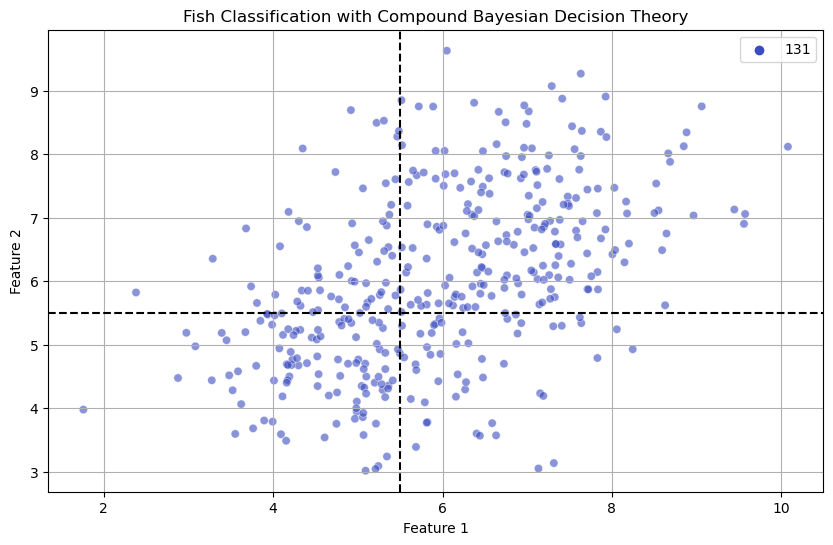

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the two fish types
n_samples = 200
feature_means = {
    'ω1': [5, 5],
    'ω2': [7, 7]
}
feature_cov = [[1, 0], [0, 1]]  # Independence between features

# Generate synthetic data for fish types
fish_type_1 = np.random.multivariate_normal(feature_means['ω1'], feature_cov, n_samples)
fish_type_2 = np.random.multivariate_normal(feature_means['ω2'], feature_cov, n_samples)

# Combine the data
data = np.vstack((fish_type_1, fish_type_2))
labels = np.array([0] * n_samples + [1] * n_samples)  # 0 for ω1, 1 for ω2

# Function to compute posterior probabilities
def compute_posteriors(data, labels, x):
    # Calculate prior probabilities
    P_ω1 = np.sum(labels == 0) / len(labels)
    P_ω2 = np.sum(labels == 1) / len(labels)
    
    # Calculate likelihoods for each class
    likelihood_ω1 = np.exp(-0.5 * np.sum((data - feature_means['ω1'])**2, axis=1)) / (2 * np.pi)
    likelihood_ω2 = np.exp(-0.5 * np.sum((data - feature_means['ω2'])**2, axis=1)) / (2 * np.pi)
    
    # Calculate posteriors
    P_x_given_ω1 = likelihood_ω1 * P_ω1
    P_x_given_ω2 = likelihood_ω2 * P_ω2
    
    # Normalize the probabilities
    total = P_x_given_ω1 + P_x_given_ω2
    posterior_ω1 = P_x_given_ω1 / total
    posterior_ω2 = P_x_given_ω2 / total
    
    return posterior_ω1, posterior_ω2

# Classify fish based on posterior probabilities
def classify(data, labels):
    predictions = []
    for x in data:
        posteriors = compute_posteriors(data, labels, x)
        predictions.append(np.argmax(posteriors))  # Select the class with the highest posterior
    return np.array(predictions)

# Making predictions
predictions = classify(data, labels)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=predictions, palette="coolwarm", alpha=0.6, edgecolor='w')
plt.title("Fish Classification with Compound Bayesian Decision Theory")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axvline(x=5.5, color='k', linestyle='--')  # Decision boundary approximation
plt.axhline(y=5.5, color='k', linestyle='--')  # Decision boundary approximation
plt.grid()
plt.show()


## Bibliographical and Historical Remarks

The power, coherence, and elegance of Bayesian theory in pattern recognition make it among the most beautiful formalisms in science. Its foundations go back to Bayes himself, of course [3], but he stated his theorem (Eq. 1) for the case of uniform priors. It was Laplace [25] who first stated it for the more general (but discrete) case. There are several modern and clear descriptions of the ideas — in pattern recognition and general decision theory — that can be recommended [7, 6, 26, 15, 13, 20, 27]. Since Bayesian theory rests on an axiomatic foundation, it is guaranteed to have quantitative coherence; some other classification methods do not.

Wald presents a non-Bayesian perspective on these topics that can be highly recommended [36], and the philosophical foundations of Bayesian and non-Bayesian methods are explored in [16]. Neyman and Pearson provided some of the most important pioneering work in hypothesis testing and used the probability of error as the criterion [28]; Wald extended this work by introducing the notions of loss and risk [35].

Certain conceptual problems have always attended the use of loss functions and prior probabilities. In fact, the Bayesian approach is avoided by many statisticians, partly because there are problems for which a decision is made only once, and partly because there may be no reasonable way to determine the prior probabilities. Neither of these difficulties seems to present a serious drawback in typical pattern recognition applications: for nearly all critical pattern recognition problems we will have training data; we will use our recognizer more than once. For these reasons, the Bayesian approach will continue to be of great use in pattern recognition.

The single most important drawback of the Bayesian approach is its assumption that the true probability distributions for the problem can be represented by the classifier, for instance, the true distributions are Gaussian, and all that is unknown are parameters describing these Gaussians. This is a strong assumption that is not always fulfilled, and we shall later consider other approaches that do not have this requirement.

Chow [10] was among the earliest to use Bayesian decision theory for pattern recognition, and he later established fundamental relations between error and reject rate [11]. Error rates for Gaussians have been explored by [18], and the Chernoff and Bhattacharyya bounds were first presented in [9, 8], respectively, and are explored in a number of statistics texts, such as [17]. Computational approximations for bounding integrals for Bayesian probability of error (the source for one of the homework problems) appears in [2].

Neyman and Pearson also worked on classification given constraints [28], and the analysis of minimax estimators for multivariate normals is presented in [5, 4, 14]. Signal detection theory and receiver operating characteristics are fully explored in [21]; a brief overview, targeting experimental psychologists, is [34]. Our discussion of the missing feature problem follows closely the work of [1], while the definitive book on missing features, including a great deal beyond our discussion here, can be found in [30]. 

Entropy was the central concept in the foundation of information theory [31], and the relation of Gaussians to entropy is explored in [33]. Readers requiring a review of information theory [12], linear algebra [24, 23], calculus and continuous mathematics [38, 32], probability [29], calculus of variations and Lagrange multipliers [19] should consult these texts and those listed in our Appendix.
